这个例子也是卷积神经网络。处理的是3通道的彩色图像。  



## 一、 前期准备

In [6]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision
from torchvision import transforms, datasets

import os,PIL,pathlib,random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

cuda


## torchvision  
torchvison是 PyTorch 生态系统中的一个包，它提供了处理图像和视频的工具和库，这些工具和库特别适用于深度学习应用。torchvision 主要包括以下几个部分：预处理数据的工具、常用的数据集、模型架构以及图像和视频的转换工具。  

**主要组成部分**  
**数据集（Datasets）：**  
torchvision 提供了许多标准的、广泛使用的数据集，如 MNIST、CIFAR-10/100、ImageNet、COCO（用于图像分割、目标检测等）等，这使得研究者和开发者能够快速开始构建和测试他们的模型。  
这些数据集通常以易于处理的格式提供，并且 torchvision 提供了加载这些数据集的便捷方法。  
**模型（Models）：**  
torchvision.models 包含了多种流行的图像相关的模型架构，如 AlexNet、VGG、ResNet、Inception、SqueezeNet 等。  
这些模型可以用作预训练模型，也可以从头开始训练。预训练模型特别有用，因为它们可以通过迁移学习在相关任务上快速获得较好的表现。  
**变换（Transforms）：**  
torchvision.transforms 提供了一系列的图像变换操作，这对于数据预处理和增强非常有用。  
这些变换包括基本的操作，如裁剪、旋转、翻转、调整大小，以及更复杂的操作，如归一化、色彩变换等。  
**工具（Utils）：**  
包括用于图像和视频的额外工具，如 make_grid（将多个图像组合成一个网格）、save_image（保存图像到磁盘）等。  
这些工具对于实现自定义数据加载、数据展示及结果的保存等功能非常有用。当使用 torchvision 时，特别要注意数据预处理和模型要求的输入格式是否一致。例如，如果模型是用 ImageNet 数据预训练的，那么你的输入数据也需要按照 ImageNet 的标准（如上面的均值和标准差）进行相应的预处理。  

In [2]:
data_dir = './data/'        # 数据集在当前目录的data目录下
data_dir = pathlib.Path(data_dir)

data_paths = list(data_dir.glob('*')) 
classeNames = [str(path).split("\\")[1] for path in data_paths]   # 每一个目录下面包含的是一个分类的图片，目录名就是分类名
classeNames

['cloudy', 'rain', 'shine', 'sunrise']

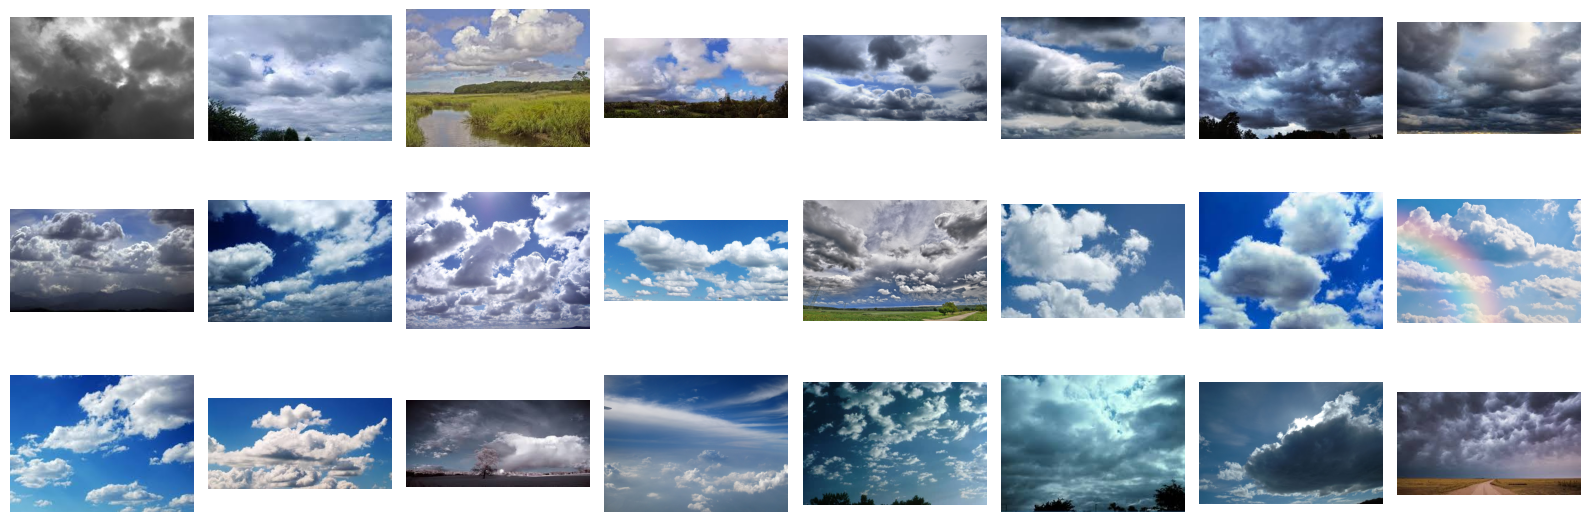

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

# 指定图像文件夹路径
image_folder = './data/cloudy/'

# 获取文件夹中的所有图像文件
image_files = [f for f in os.listdir(image_folder) if f.endswith((".jpg", ".png", ".jpeg"))]

# 创建Matplotlib图像
fig, axes = plt.subplots(3, 8, figsize=(16, 6))

# 使用列表推导式加载和显示图像
for ax, img_file in zip(axes.flat, image_files):
    img_path = os.path.join(image_folder, img_file)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')

# 显示图像
plt.tight_layout()
plt.show()

In [4]:
total_datadir = './data/'

# 关于transforms.Compose实际相当于把一系列对图片进行的操作打包，一个一个执行
train_transforms = transforms.Compose([
    transforms.Resize([224, 224]),  # 将输入图片resize成统一尺寸
    transforms.ToTensor(),          # 将PIL Image或numpy.ndarray转换为tensor，并归一化到[0,1]之间
    transforms.Normalize(           # 标准化处理-->转换为标准正太分布（高斯分布），使模型更容易收敛
        mean=[0.485, 0.456, 0.406], 
        std=[0.229, 0.224, 0.225])  # 其中 mean=[0.485,0.456,0.406]与std=[0.229,0.224,0.225] 从数据集中随机抽样计算得到的。
])

total_data = datasets.ImageFolder(total_datadir,transform=train_transforms)
total_data

Dataset ImageFolder
    Number of datapoints: 1125
    Root location: ./data/
    StandardTransform
Transform: Compose(
               Resize(size=[224, 224], interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [ ]:
torchvision的transoforms负责对图像进行各种操作。
### Transforms对于图像的操作
#### 一、 裁剪——Crop
1.中心裁剪：transforms.CenterCrop  
2.随机裁剪：transforms.RandomCrop   
3.随机长宽比裁剪 transforms.RandomResizedCrop  
4.上下左右中心裁剪：transforms.FiveCrop  
5.上下左右中心裁剪后翻转: transforms.TenCrop  
#### 二、翻转和旋转——Flip and Rotation
6.依概率p水平翻转transforms.RandomHorizontalFlip  
7.依概率p垂直翻转transforms.RandomVerticalFlip  
8.随机旋转：transforms.RandomRotation  
#### 三、图像变换
9.resize：transforms.Resize  
10.转为tensor：transforms.ToTensor  
11.标准化：transforms.Normalize  
12.填充：transforms.Pad  
13.修改亮度、对比度和饱和度：transforms.ColorJitter  
14.转灰度图：transforms.Grayscale  
15.线性变换：transforms.LinearTransformation()  
16.仿射变换：transforms.RandomAffine  
17.依概率p转为灰度图：transforms.RandomGrayscale  
18.将数据转换为PILImage：transforms.ToPILImage  
19.transforms.Lambda  
#### 四、对transforms操作，使数据增强更灵活
20.transforms.RandomChoice(transforms)  
21.transforms.RandomApply(transforms, p=0.5)  
22.transforms.RandomOrder  

具体上面这22中操作可以参考 PyTorch 学习笔记：transforms的二十二个方法

In [5]:
train_size = int(0.8 * len(total_data))      # 表示训练集大小，设置为总体数据长度的80%；
test_size  = len(total_data) - train_size    # 表示测试集大小，总体长度去掉训练集
train_dataset, test_dataset = torch.utils.data.random_split(total_data, [train_size, test_size]) # 
train_dataset, test_dataset

(<torch.utils.data.dataset.Subset at 0x28779f7f890>,
 <torch.utils.data.dataset.Subset at 0x2877a1cad50>)

使用torch.utils.data.random_split()方法进行数据集划分。该方法将总体数据total_data按照指定的大小比例（[train_size, test_size]）随机划分为训练集和测试集，并将划分结果分别赋值给train_dataset和test_dataset两个变量。

In [8]:
batch_size = 32

train_dl = torch.utils.data.DataLoader(train_dataset,
                                       batch_size=batch_size,
                                       shuffle=True,
                                       num_workers=1)
test_dl = torch.utils.data.DataLoader(test_dataset,
                                      batch_size=batch_size,
                                      shuffle=True,
                                      num_workers=1)

# 查看一下数据
# 可以看到X是[32,3,224,224]，其中维度通常为 [N, C, H, W]（N是批量大小，C是通道数，H是高度，W是宽度）,32个一组，3通道的224x224图像
# Y是32个一组的整数（标签）
for X, y in test_dl:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([32, 3, 224, 224])
Shape of y:  torch.Size([32]) torch.int64


## 二、构建简单的CNN网络

In [9]:
import torch.nn.functional as F

class Network_bn(nn.Module):
    def __init__(self):
        super(Network_bn, self).__init__()
        """
        nn.Conv2d()函数：
        第一个参数（in_channels）是输入的channel数量
        第二个参数（out_channels）是输出的channel数量
        第三个参数（kernel_size）是卷积核大小
        第四个参数（stride）是步长，默认为1
        第五个参数（padding）是填充大小，默认为0
        """
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=5, stride=1, padding=0) # 12*220*220
        self.bn1 = nn.BatchNorm2d(12)                                                              # 12*220*220
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=12, kernel_size=5, stride=1, padding=0)# 12*216*216 
        self.bn2 = nn.BatchNorm2d(12)                                                              # 12*216*216
        self.pool1 = nn.MaxPool2d(2,2)                                                             # 12*108*108                                                             # 12*220*220
        self.conv4 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=5, stride=1, padding=0)# 24*104*104
        self.bn4 = nn.BatchNorm2d(24)                                                              # 24*104*104
        self.conv5 = nn.Conv2d(in_channels=24, out_channels=24, kernel_size=5, stride=1, padding=0)# 24*100*100
        self.bn5 = nn.BatchNorm2d(24)                                                              # 24*100*100
        self.pool2 = nn.MaxPool2d(2,2)                                                             # 24*50*50
        self.fc1 = nn.Linear(24*50*50, len(classeNames))

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))      
        x = F.relu(self.bn2(self.conv2(x)))     
        x = self.pool1(x)                        
        x = F.relu(self.bn4(self.conv4(x)))     
        x = F.relu(self.bn5(self.conv5(x)))  
        x = self.pool2(x)                        
        x = x.view(-1, 24*50*50)
        x = self.fc1(x)

        return x

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

model = Network_bn().to(device)
model

Using cuda device


Network_bn(
  (conv1): Conv2d(3, 12, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(12, 12, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(12, 24, kernel_size=(5, 5), stride=(1, 1))
  (bn4): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(24, 24, kernel_size=(5, 5), stride=(1, 1))
  (bn5): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=60000, out_features=4, bias=True)
)

这里的模型类的实现和前面MNIST识别的例子略有不同，仔细观察一下，除了增加了一个BatchNorm2d以外，其他的实际是一样的，只是写法不同。  
**BatchNorm2d** 是 PyTorch 中的一个非常重要的层，全称为二维批量归一化（Batch Normalization）。它主要用于卷积神经网络中，处理四维输入数据，其中维度通常为 [N, C, H, W]（N是批量大小，C是通道数，H是高度，W是宽度）。批量归一化层在训练深度神经网络时起到关键作用，可以带来几个重要的好处：
**加速训练过程：** 通过规范化层的输入，使其均值为 0 和方差为 1，可以帮助缓解训练过程中的梯度消失问题，允许使用更高的学习率，从而加速网络的收敛速度。
**减少内部协变量偏移（Internal Covariate Shift）：** 通过稳定网络中间层的输入分布，减少训练过程中分布的偏移，从而提高模型的训练效率和稳定性。**起到轻微正则化效果：** 由于批量归一化在每个批次上独立工作，引入了一些噪声，这类似于轻微的正则化效果，有助于防止模型过拟合。

## 三、 训练模型  
### 设置超参数

In [10]:
loss_fn    = nn.CrossEntropyLoss() # 创建损失函数
learn_rate = 1e-4 # 学习率
opt        = torch.optim.SGD(model.parameters(),lr=learn_rate)

In [ ]:
### 训练函数

In [11]:
# 训练循环
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)  # 训练集的大小，一共60000张图片
    num_batches = len(dataloader)   # 批次数目，1875（60000/32）

    train_loss, train_acc = 0, 0  # 初始化训练损失和正确率
    
    for X, y in dataloader:  # 获取图片及其标签
        X, y = X.to(device), y.to(device)
        
        # 计算预测误差
        pred = model(X)          # 网络输出
        loss = loss_fn(pred, y)  # 计算网络输出和真实值之间的差距，targets为真实值，计算二者差值即为损失
        
        # 反向传播
        optimizer.zero_grad()  # grad属性归零
        loss.backward()        # 反向传播
        optimizer.step()       # 每一步自动更新
        
        # 记录acc与loss
        train_acc  += (pred.argmax(1) == y).type(torch.float).sum().item()
        train_loss += loss.item()
            
    train_acc  /= size
    train_loss /= num_batches

    return train_acc, train_loss

### 测试函数

In [13]:
def test (dataloader, model, loss_fn):
    size        = len(dataloader.dataset)  # 测试集的大小，一共10000张图片
    num_batches = len(dataloader)          # 批次数目，313（10000/32=312.5，向上取整）
    test_loss, test_acc = 0, 0
    
    # 当不进行训练时，停止梯度更新，节省计算内存消耗
    with torch.no_grad():
        for imgs, target in dataloader:
            imgs, target = imgs.to(device), target.to(device)
            
            # 计算loss
            target_pred = model(imgs)
            loss        = loss_fn(target_pred, target)
            
            test_loss += loss.item()
            test_acc  += (target_pred.argmax(1) == target).type(torch.float).sum().item()

    test_acc  /= size
    test_loss /= num_batches

    return test_acc, test_loss

### 训练

In [14]:
epochs     = 20
train_loss = []
train_acc  = []
test_loss  = []
test_acc   = []

for epoch in range(epochs):
    model.train()
    epoch_train_acc, epoch_train_loss = train(train_dl, model, loss_fn, opt)
    
    model.eval()
    epoch_test_acc, epoch_test_loss = test(test_dl, model, loss_fn)
    
    train_acc.append(epoch_train_acc)
    train_loss.append(epoch_train_loss)
    test_acc.append(epoch_test_acc)
    test_loss.append(epoch_test_loss)
    
    template = ('Epoch:{:2d}, Train_acc:{:.1f}%, Train_loss:{:.3f}, Test_acc:{:.1f}%，Test_loss:{:.3f}')
    print(template.format(epoch+1, epoch_train_acc*100, epoch_train_loss, epoch_test_acc*100, epoch_test_loss))
print('Done')

Epoch: 1, Train_acc:79.9%, Train_loss:0.643, Test_acc:78.2%，Test_loss:0.608
Epoch: 2, Train_acc:82.7%, Train_loss:0.550, Test_acc:80.4%，Test_loss:0.518
Epoch: 3, Train_acc:86.9%, Train_loss:0.469, Test_acc:80.9%，Test_loss:0.500
Epoch: 4, Train_acc:88.1%, Train_loss:0.414, Test_acc:84.9%，Test_loss:0.429
Epoch: 5, Train_acc:88.9%, Train_loss:0.395, Test_acc:83.1%，Test_loss:0.537
Epoch: 6, Train_acc:91.0%, Train_loss:0.367, Test_acc:83.6%，Test_loss:0.399
Epoch: 7, Train_acc:91.6%, Train_loss:0.319, Test_acc:84.9%，Test_loss:0.518
Epoch: 8, Train_acc:90.9%, Train_loss:0.324, Test_acc:83.6%，Test_loss:0.558
Epoch: 9, Train_acc:91.1%, Train_loss:0.287, Test_acc:85.8%，Test_loss:0.352
Epoch:10, Train_acc:93.0%, Train_loss:0.256, Test_acc:85.3%，Test_loss:0.391
Epoch:11, Train_acc:93.4%, Train_loss:0.241, Test_acc:86.2%，Test_loss:0.342
Epoch:12, Train_acc:93.6%, Train_loss:0.248, Test_acc:87.1%，Test_loss:0.358
Epoch:13, Train_acc:94.7%, Train_loss:0.219, Test_acc:87.1%，Test_loss:0.353
Epoch:14, Tr

### 结果可视化

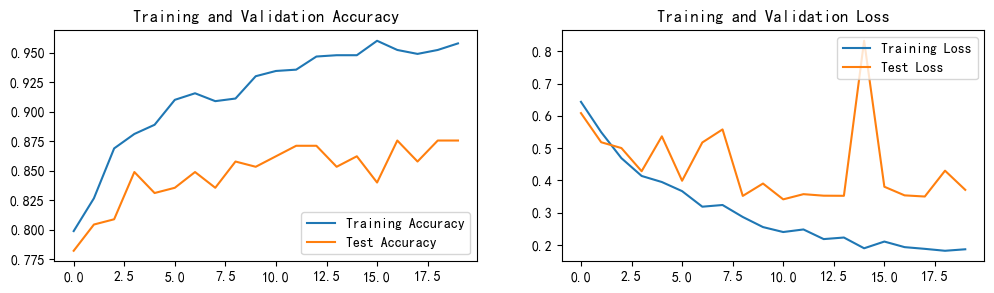

In [15]:
import matplotlib.pyplot as plt
#隐藏警告
import warnings
warnings.filterwarnings("ignore")               #忽略警告信息
plt.rcParams['font.sans-serif']    = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False      # 用来正常显示负号
plt.rcParams['figure.dpi']         = 100        #分辨率

epochs_range = range(epochs)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()